In [32]:

import math
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go 


In [3]:


def bomber():
    # Bomber,(B) and fighter(f)
    Xb = [100,100,120,129,140,149,158,168,179,188,198,209,219,226,234,240]
    Yb = [0,3,6,10,15,20,26,32,37,34,30,27,23,19,16,14]
    Xf = 0
    Yf = 50
    S = 20
    time = 0 
    ans = []
    while True: 
        # hypotenuse:
        dist = math.sqrt((Yb[time]-Yf)**2 + (Xb[time]-Xf)**2)
        # y_vaule / hypotenuse
        sin = (Yb[time]-Yf)/dist
        cos = (Xb[time]-Xf)/dist
        ans.append({
            "Time":time,
            "Bomber-X":Xb[time],
            "Bomber-Y":Yb[time],
            "distance": dist,
            "sin_theta":sin,
            "cos_theta":cos,
            "Fighter-X":Xf,
            "Fighter-Y":Yf,
        })
        if dist<=10:
            break 
        time+=1
        Xf += S * cos 
        Yf += S * sin 
    return pd.DataFrame(ans)

df = bomber()
df

,Time,Bomber-X,Bomber-Y,distance,sin_theta,cos_theta,Fighter-X,Fighter-Y
0,0,100,0,111.803399,-0.447214,0.894427,0.000000,50.000000
1,1,100,3,90.501545,-0.420498,0.907293,17.888544,41.055728
2,2,120,6,88.092093,-0.302476,0.953157,36.034412,32.645766
3,3,129,10,75.743034,-0.219112,0.975700,55.097551,26.596241
4,4,140,15,65.785196,-0.109660,0.993969,74.611543,22.213992
5,5,149,20,54.509078,-0.000382,1.000000,94.490926,20.020796
6,6,158,26,43.919037,0.136315,0.990666,114.490925,20.013166
7,7,168,32,34.945128,0.265002,0.964248,134.304235,22.739471
8,8,179,37,26.944378,0.332555,0.943084,153.589192,28.039511
9,9,188,34,15.564460,-0.044371,0.999015,172.450869,34.690612


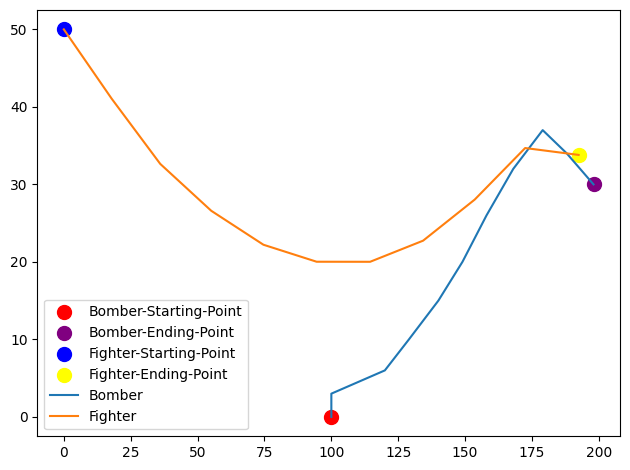

In [ ]:


plt.scatter(df["Bomber-X"][0],df["Bomber-Y"][0],c='red',s=100,label="Bomber-Starting-Point")
plt.scatter(df["Bomber-X"].iloc[-1],df["Bomber-Y"].iloc[-1],c='purple',s=100,label="Bomber-Ending-Point")

plt.scatter(df["Fighter-X"][0],df["Fighter-Y"][0],c='blue',s=100,label="Fighter-Starting-Point")
plt.scatter(df["Fighter-X"].iloc[-1],df["Fighter-Y"].iloc[-1],c='yellow',s=100,label="Fighter-Ending-Point")

plt.plot(df['Bomber-X'],df['Bomber-Y'],label="Bomber")
plt.plot(df['Fighter-X'],df['Fighter-Y'],label="Fighter")
plt.legend()
plt.tight_layout()
plt.show()



In [42]:
df["Bomber-X"][:0]

Series([], Name: Bomber-X, dtype: int64)

In [51]:

# live animation code:
trace1 = go.Scatter(x=[df["Bomber-X"].iloc[0]], y=[df["Bomber-Y"].iloc[0]], 
                    mode="markers", name="Bomber-Starting-Point")
trace2 = go.Scatter(x=[df["Bomber-X"].iloc[0]], y=[df["Bomber-Y"].iloc[0]], 
                    mode="markers", name="Bomber-Ending-Point")
trace3 = go.Scatter(x=[df["Fighter-X"].iloc[0]], y=[df["Fighter-Y"].iloc[0]], 
                    mode="markers", name="Fighter-Starting-Point")
trace4 = go.Scatter(x=[df["Fighter-X"].iloc[0]], y=[df["Fighter-Y"].iloc[0]], 
                    mode="markers", name="Fighter-Ending-Point")

# trace5 = go.Scatter(x=df['Bomber-X'], y=df['Bomber-Y'], mode="lines", name="Bomber")
# trace6 = go.Scatter(x=df['Fighter-X'], y=df['Fighter-Y'], mode="lines", name="Fighter")

trace5 = go.Scatter(x=[], y=[], mode="lines", name="Bomber")
trace6 = go.Scatter(x=[], y=[], mode="lines", name="Fighter")

trace = [trace1, trace2, trace3, trace4, trace5, trace6]

# frames:
frames = []
for i in range(len(df)):
    frames.append(
        go.Frame(
            data=[
                # starting and ending
                go.Scatter(x=[df["Bomber-X"].iloc[0]], y=[df["Bomber-Y"].iloc[0]],
                           mode="markers", name="Bomber-Starting-Point"),
                go.Scatter(x=[df["Bomber-X"].iloc[-i]], y=[df["Bomber-Y"].iloc[-i]], 
                           mode="markers", name="Bomber-Ending-Point"),
                go.Scatter(x=[df["Fighter-X"].iloc[i]], y=[df["Fighter-Y"].iloc[i]],
                           mode="markers", name="Fighter-Starting-Point"),
                go.Scatter(x=[df["Fighter-X"].iloc[-i]], y=[df["Fighter-Y"].iloc[-i]], 
                           mode="markers", name="Fighter-Ending-Point"),
                
                # line ploting:
                go.Scatter(x=df['Bomber-X'][:i+1], y=df['Bomber-Y'][:i+1], mode="lines", name="Bomber"),
                go.Scatter(x=df['Fighter-X'][:i+1], y=df['Fighter-Y'][:i+1], mode="lines", name="Fighter")
            ],
            name=str(i),
            traces=[0,1,2,3,4,5]
        )
    )
    
    
layout = go.Layout(
    xaxis=dict(title="xaxis", showgrid=False),
    yaxis=dict(title="yaxis", showgrid=False),
    paper_bgcolor="black",
    plot_bgcolor="black",
    updatemenus=[dict(
                type="buttons",
                direction="down",
                buttons=[dict(args=[
                        None, # run all the frame 
                        {
                            "frame": {"duration": 300, "redraw": True},
                            "transition": {"duration": 300},
                            "fromcurrent": True}],
                        label="Play",
                        method="animate")])],
    showlegend=True
)

fig = go.Figure(data=trace, layout=layout,frames=frames)
fig.show()


